<a href="https://colab.research.google.com/github/NataliProhorova/Data-_Pyton-_Code_Info/blob/main/Caa1_Viz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd
import numpy as np

In [7]:
import pandas as pd
import plotly.express as px

In [8]:
vgs = pd.read_csv('/vgsales.csv')


In [9]:
vgs.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


Some data are missing.

In [10]:
vgs.dtypes


,0
Name,object
Platform,object
Year_of_Release,float64
Genre,object
Publisher,object
NA_Sales,float64
EU_Sales,float64
JP_Sales,float64
Other_Sales,float64
Global_Sales,float64


In [11]:
vgs.shape

(16719, 16)

In [12]:
vgs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


In [13]:
vgs.isnull().sum()

,0
Name,2
Platform,0
Year_of_Release,269
Genre,2
Publisher,54
NA_Sales,0
EU_Sales,0
JP_Sales,0
Other_Sales,0
Global_Sales,0


# Missing Values:



*   Name: 2 missing values
*   Year_of_Release: 269 missing values
*   Genre: 2 missing values
*   Publisher: 54 missing values


# Data Type Concerns:


*  Year_of_Release: Currently float64, should ideally be an integer type to represent years.
*   User_Score: Currently object, should likely be numeric (float64) if it represents user ratings






In [14]:
vgs['Year_of_Release'] = pd.to_numeric(vgs['Year_of_Release'], errors='coerce').astype('Int64')  # Convert to Int64, handle errors

In [15]:
vgs['User_Score'] = pd.to_numeric(vgs['User_Score'], errors='coerce')  # Convert to numeric, handle errors

In [16]:
vgs.loc[vgs['Name'].isnull(), 'Name'] = 'Unknown'
vgs.loc[vgs['Genre'].isnull(), 'Genre'] = 'Unknown'
vgs.loc[vgs['Publisher'].isnull(), 'Publisher'] = 'Unknown'

In [17]:
vgs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16719 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  Int64  
 3   Genre            16719 non-null  object 
 4   Publisher        16719 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       7590 non-null   float64
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: Int64(1), float64(9), object(6)
memory usage: 2.1+ MB


In [18]:
vgs.isnull().sum()

,0
Name,0
Platform,0
Year_of_Release,269
Genre,0
Publisher,0
NA_Sales,0
EU_Sales,0
JP_Sales,0
Other_Sales,0
Global_Sales,0


now we have 2 columns with missing values Year and User score /


*   the number of missing values is relatively small and the 'Year_of_Release' is not crucial for  analysis (16000 rowsvsVS 269) remove the rows with missing values using dropna()
  



In [19]:
vgs.dropna(subset=['Year_of_Release'], inplace=True)

In [20]:
vgs['Year_of_Release'].isnull().sum()


np.int64(0)

In [21]:
# User_Score unique

vgs['User_Score'].unique()


array([8. , nan, 8.3, 8.5, 6.6, 8.4, 8.6, 7.7, 6.3, 7.4, 8.2, 9. , 7.9,
       8.1, 8.7, 7.1, 3.4, 5.3, 4.8, 3.2, 8.9, 6.4, 7.8, 7.5, 2.6, 7.2,
       9.2, 7. , 7.3, 4.3, 7.6, 5.7, 5. , 9.1, 6.5, 8.8, 6.9, 9.4, 6.8,
       6.1, 6.7, 5.4, 4. , 4.9, 4.5, 9.3, 6.2, 4.2, 6. , 3.7, 4.1, 5.8,
       5.6, 5.5, 4.4, 4.6, 5.9, 3.9, 3.1, 2.9, 5.2, 3.3, 4.7, 5.1, 3.5,
       2.5, 1.9, 3. , 2.7, 2.2, 2. , 9.5, 2.1, 3.6, 2.8, 1.8, 3.8, 0. ,
       1.6, 9.6, 2.4, 1.7, 1.1, 0.3, 1.5, 0.7, 1.2, 2.3, 0.5, 1.3, 0.2,
       0.6, 1.4, 0.9, 1. , 9.7])

For Score: almost 50%  data missing /we can simply apply imputayion of mean value mean_user_score = user_scores.mean()
     vgs['User_Score'].fillna(mean_user_score, inplace=True)/also some values 2.   or 5.   - looks as impuation problem / lets convert all data to numeric and fill really missed values to nan

In [22]:
vgs['User_Score'] = vgs['User_Score'].astype(str).str.rstrip('.')  # Remove trailing dots
vgs['User_Score'] = pd.to_numeric(vgs['User_Score'], errors='coerce').fillna(0)  # Convert to numeric and fill NaNs with 0 (or an appropriate imputation strategy)

In [23]:
vgs['Year_of_Release'].isnull().sum()

np.int64(0)

In [24]:
vgs['User_Score'].unique()

array([8. , 0. , 8.3, 8.5, 6.6, 8.4, 8.6, 7.7, 6.3, 7.4, 8.2, 9. , 7.9,
       8.1, 8.7, 7.1, 3.4, 5.3, 4.8, 3.2, 8.9, 6.4, 7.8, 7.5, 2.6, 7.2,
       9.2, 7. , 7.3, 4.3, 7.6, 5.7, 5. , 9.1, 6.5, 8.8, 6.9, 9.4, 6.8,
       6.1, 6.7, 5.4, 4. , 4.9, 4.5, 9.3, 6.2, 4.2, 6. , 3.7, 4.1, 5.8,
       5.6, 5.5, 4.4, 4.6, 5.9, 3.9, 3.1, 2.9, 5.2, 3.3, 4.7, 5.1, 3.5,
       2.5, 1.9, 3. , 2.7, 2.2, 2. , 9.5, 2.1, 3.6, 2.8, 1.8, 3.8, 1.6,
       9.6, 2.4, 1.7, 1.1, 0.3, 1.5, 0.7, 1.2, 2.3, 0.5, 1.3, 0.2, 0.6,
       1.4, 0.9, 1. , 9.7])

In [25]:
vgs.isnull().sum()

,0
Name,0
Platform,0
Year_of_Release,0
Genre,0
Publisher,0
NA_Sales,0
EU_Sales,0
JP_Sales,0
Other_Sales,0
Global_Sales,0


In [26]:
print(vgs.isnull().sum())

Name                  0
Platform              0
Year_of_Release       0
Genre                 0
Publisher             0
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8467
Critic_Count       8467
User_Score            0
User_Count         8987
Developer          6543
Rating             6681
dtype: int64


In [27]:
print(vgs.dtypes)

Name                object
Platform            object
Year_of_Release      Int64
Genre               object
Publisher           object
NA_Sales           float64
EU_Sales           float64
JP_Sales           float64
Other_Sales        float64
Global_Sales       float64
Critic_Score       float64
Critic_Count       float64
User_Score         float64
User_Count         float64
Developer           object
Rating              object
dtype: object


In [28]:
vgs.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,0.0,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,0.0,NaN,NaN,NaN


Now we see that  is no missing values

In [29]:


vgs['Rating'].unique()


array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

looks nonsufficient info ,and enough similar data  .drop this column

From column description:

In [30]:


vgs = vgs.drop('Rating', axis=1)


In [31]:
vgs.head(30)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer
0,Wii Sports,Wii,2006,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,Nintendo
1,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,0.0,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0,Nintendo
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,0.0,NaN,NaN
5,Tetris,GB,1989,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,NaN,NaN,0.0,NaN,NaN
6,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo
7,Wii Play,Wii,2006,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo
8,New Super Mario Bros. Wii,Wii,2009,Platform,Nintendo,14.44,6.94,4.70,2.24,28.32,87.0,80.0,8.4,594.0,Nintendo
9,Duck Hunt,NES,1984,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31,NaN,NaN,0.0,NaN,NaN




*   "Publisher" and "Developer" are distinct roles in the video game industry, so they are likely not the same columns.



In [32]:
print((vgs['Publisher'] == 'Unknown').sum())

131


In [33]:
print((vgs['Developer'] == 'Unknown').sum())

0


In [34]:
nintendo_both = vgs[(vgs['Publisher'] == 'Nintendo') & (vgs['Developer'] == 'Nintendo')]
print(f"Number of games where Nintendo is both publisher and developer: {len(nintendo_both)}")

# Optionally, display those rows
print(nintendo_both[['Name', 'Publisher', 'Developer']]) # select relevant columns for display

Number of games where Nintendo is both publisher and developer: 72
                                    Name Publisher Developer
0                             Wii Sports  Nintendo  Nintendo
2                         Mario Kart Wii  Nintendo  Nintendo
3                      Wii Sports Resort  Nintendo  Nintendo
6                  New Super Mario Bros.  Nintendo  Nintendo
7                               Wii Play  Nintendo  Nintendo
...                                  ...       ...       ...
5058                     Wii Sports Club  Nintendo  Nintendo
5354     Classic NES Series: Ice Climber  Nintendo  Nintendo
6761      Classic NES Series: Excitebike  Nintendo  Nintendo
8453   Cubivore: Survival of the Fittest  Nintendo  Nintendo
10849  Brain Age: Concentration Training  Nintendo  Nintendo

[72 rows x 3 columns]


** Nintendo can be both the publisher and developer of a game **

In [35]:
vgs.loc[(vgs['Developer'] == 'Unknown') & (vgs['Publisher'] == 'Nintendo'), 'Developer'] = 'Nintendo'

In [36]:
print((vgs['Developer'] == 'Unknown').sum())

0


In [37]:

vgs['Developer'].unique()

array(['Nintendo', nan, 'Good Science Studio', ..., 'Big Red Software',
       'Atomic Games', 'Interchannel-Holon'], dtype=object)

In [38]:


top_10_developers = vgs['Developer'].value_counts().nlargest(10)
top_10_developers


,count
Developer,
Ubisoft,201
EA Sports,169
EA Canada,164
Konami,158
Capcom,137
EA Tiburon,104
Electronic Arts,101
Ubisoft Montreal,100
Visual Concepts,98


In [39]:
unknown_dev_publishers = vgs.loc[vgs['Developer'] == 'Unknown', 'Publisher'].unique()

print(unknown_dev_publishers)


[]


In [40]:
# Get counts of each publisher where the developer is 'Unknown'
publisher_counts = vgs.loc[vgs['Developer'] == 'Unknown', 'Publisher'].value_counts()

# Select the top 10 publishers
top_10 = publisher_counts.nlargest(10)
print(top_10)


Series([], Name: count, dtype: int64)


In [41]:
unknown_developer_count = len(vgs[(vgs['Publisher'] == 'Namco Bandai Games') & (vgs['Developer'] == 'Unknown')])

print(f"Number of games with Publisher 'Namco Bandai Games' and Developer 'Unknown': {unknown_developer_count}")

Number of games with Publisher 'Namco Bandai Games' and Developer 'Unknown': 0


In [42]:

namco_bandai_df = vgs[vgs['Publisher'] == 'Namco Bandai Games'][['Publisher', 'Developer']]

# Print the first few rows of the new DataFrame (optional)
print(namco_bandai_df.head(15))

               Publisher              Developer
266   Namco Bandai Games             Mass Media
297   Namco Bandai Games                  Namco
301   Namco Bandai Games        Digital Eclipse
303   Namco Bandai Games  CD Projekt Red Studio
315   Namco Bandai Games                  Namco
387   Namco Bandai Games                  Namco
453   Namco Bandai Games                    NaN
548   Namco Bandai Games     Namco Bandai Games
740   Namco Bandai Games                    NaN
822   Namco Bandai Games                  Namco
825   Namco Bandai Games                  Namco
845   Namco Bandai Games          From Software
961   Namco Bandai Games             Mass Media
963   Namco Bandai Games          From Software
1020  Namco Bandai Games          Monolith Soft


  lets replace all unknown developers with Publisher name

In [43]:
vgs.loc[vgs['Developer'] == 'Unknown', 'Developer'] = vgs.loc[vgs['Developer'] == 'Unknown', 'Publisher']

In [44]:


top_10_developers = vgs['Developer'].value_counts().nlargest(10)
top_10_developers

,count
Developer,
Ubisoft,201
EA Sports,169
EA Canada,164
Konami,158
Capcom,137
EA Tiburon,104
Electronic Arts,101
Ubisoft Montreal,100
Visual Concepts,98


In [45]:
print((vgs['Developer'] == 'Unknown').sum())

0


In [46]:
print((vgs['Publisher'] == 'Unknown').sum())

131


In [47]:


# Drop rows where 'Publisher' is 'Unknown'
vgs = vgs[vgs['Publisher'] != 'Unknown']
print((vgs['Publisher'] == 'Unknown').sum())

0


In [48]:
vgs.isnull().sum()

,0
Name,0
Platform,0
Year_of_Release,0
Genre,0
Publisher,0
NA_Sales,0
EU_Sales,0
JP_Sales,0
Other_Sales,0
Global_Sales,0


In [49]:
vgs.dropna(subset=['Publisher'], inplace=True)
vgs.dropna(subset=['Developer'], inplace=True)
vgs.dropna(subset=['Critic_Score'], inplace=True)
vgs.dropna(subset=['Critic_Count'], inplace=True)

vgs.dropna(subset=['User_Count'], inplace=True)


<ipython-input-49-78ddacb11b50>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vgs.dropna(subset=['Publisher'], inplace=True)
<ipython-input-49-78ddacb11b50>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vgs.dropna(subset=['Developer'], inplace=True)
<ipython-input-49-78ddacb11b50>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vgs.dropna(subset=['Critic_Score'], inplace=True)
<ipython-input-49-78ddacb11b50>:4: SettingWithCopyWa

In [50]:
vgs.isnull().sum()

,0
Name,0
Platform,0
Year_of_Release,0
Genre,0
Publisher,0
NA_Sales,0
EU_Sales,0
JP_Sales,0
Other_Sales,0
Global_Sales,0


In [51]:
vgs.describe()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count
count,6863.0,6863.000000,6863.000000,6863.000000,6863.000000,6863.000000,6863.000000,6863.000000,6863.000000,6863.000000
mean,2007.470494,0.392113,0.235382,0.064073,0.082302,0.774052,70.279324,28.885181,7.187921,174.421827
std,4.237825,0.965157,0.685625,0.287076,0.269183,1.958749,13.857950,19.210001,1.435768,585.755701
min,1985.0,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,0.500000,4.000000
25%,2004.0,0.060000,0.020000,0.000000,0.010000,0.110000,62.000000,14.000000,6.500000,11.000000
50%,2007.0,0.150000,0.060000,0.000000,0.020000,0.290000,72.000000,24.000000,7.500000,27.000000
75%,2011.0,0.390000,0.210000,0.010000,0.070000,0.750000,80.000000,39.000000,8.200000,89.000000
max,2016.0,41.360000,28.960000,6.500000,10.570000,82.530000,98.000000,113.000000,9.600000,10665.000000


In [52]:
!pip install plotly.express
import plotly.express as px
import pandas as pd

# Assuming 'vgs' is your DataFrame

# --- 1. Bar Chart: Top 10 Genres by Global Sales ---
top_genres = vgs.groupby('Genre')['Global_Sales'].sum().sort_values(ascending=False).head(10)
fig1 = px.bar(top_genres, x=top_genres.index, y='Global_Sales',
             title='Top 10 Genres by Global Sales',
             labels={'Global_Sales': 'Global Sales (Millions)'})
fig1.show()

In [53]:
fig2 = px.histogram(vgs, x='Year_of_Release',
                   title='Distribution of Game Release Years',
                   nbins=20)  # Adjust nbins for desired bin size
fig2.show()

In [54]:
region_sales = vgs[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum()
fig5 = px.pie(values=region_sales.values, names=region_sales.index,
             title='Market Share by Region')
fig5.show()

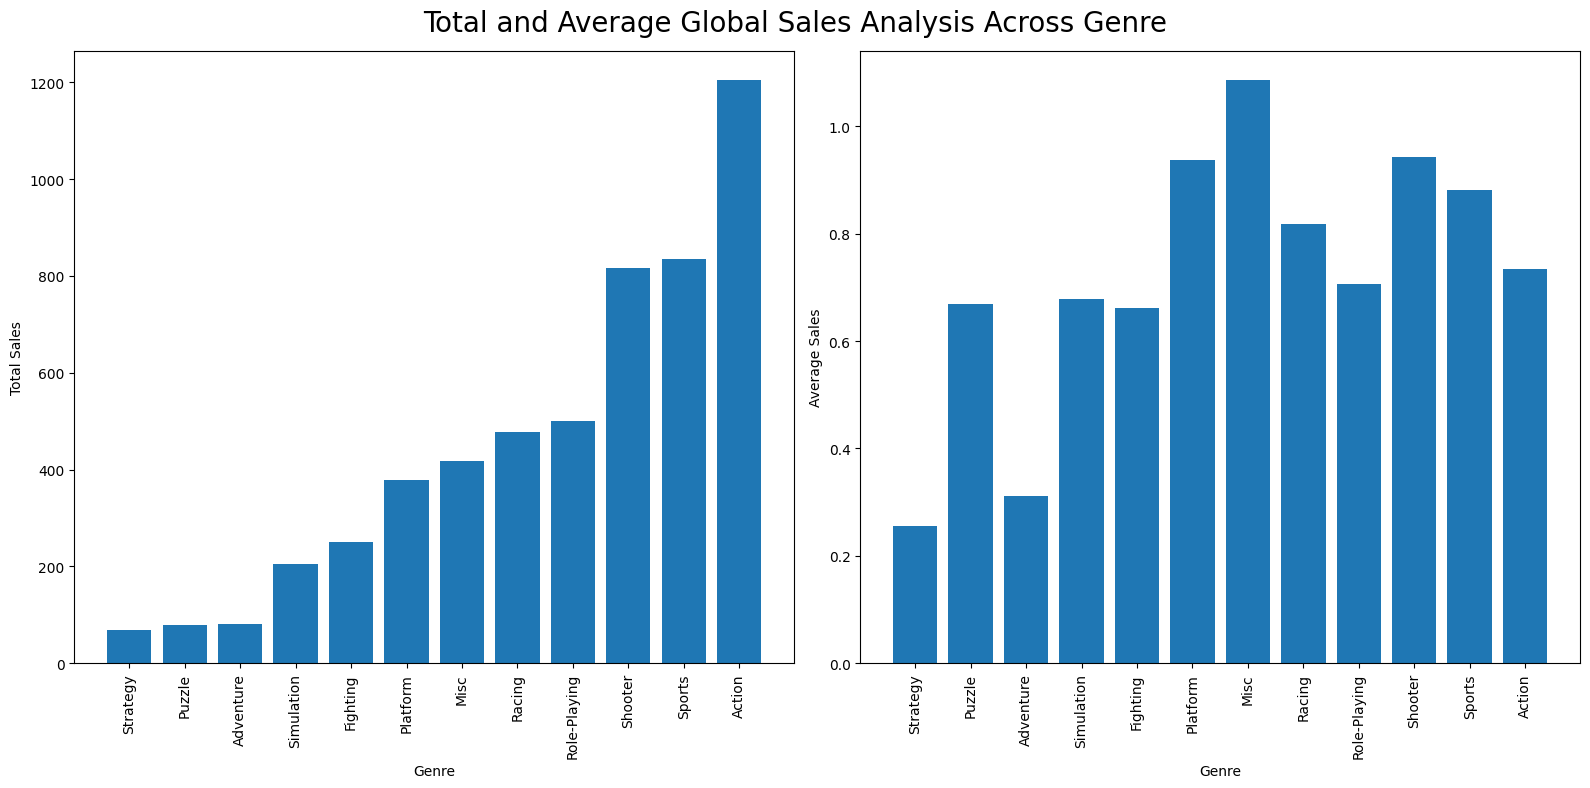

In [55]:
totalsales = vgs.groupby('Genre')['Global_Sales'].sum().reset_index()

# Calculate average sales per genre
avgsales = vgs.groupby('Genre')['Global_Sales'].mean().reset_index()

sales = []
for i in range(0, len(totalsales)):
    one = {
        'Genre': totalsales.iloc[i]['Genre'],
        'Total_Sales': totalsales.iloc[i]['Global_Sales'],
        'Avg_Sales': avgsales.iloc[i]['Global_Sales']
    }
    sales.append(one)

sales = pd.DataFrame(sales)
sales.sort_values('Total_Sales', inplace=True)

# Import the 'pyplot' module from 'matplotlib' and alias it as 'plt'
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 8))
plt.suptitle('Total and Average Global Sales Analysis Across Genre', fontsize=20)

# Assuming you want a bar plot for total sales
plt.subplot(121)  # 1 row, 2 columns, first subplot
plt.bar(sales['Genre'], sales['Total_Sales'])
plt.xlabel('Genre')
plt.ylabel('Total Sales')
plt.xticks(rotation=90)  # Rotate x-axis labels for readability

# Add a bar plot for average sales in the second subplot
plt.subplot(122)  # 1 row, 2 columns, second subplot
plt.bar(sales['Genre'], sales['Avg_Sales'])
plt.xlabel('Genre')
plt.ylabel('Average Sales')
plt.xticks(rotation=90)

plt.tight_layout() # Adjusts subplot params so that subplots fits in to the figure area.
plt.show()  # Display the plot

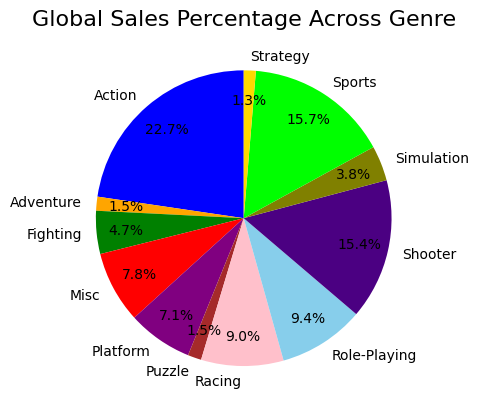

In [56]:
color=['blue','orange','green','red','purple','brown','pink','skyblue','indigo','olive','lime','gold']
#plt.figure(figsize=(5,5))
plt.pie(totalsales.Global_Sales,labels=totalsales.Genre,pctdistance=0.8,labeldistance=1.1,autopct='%1.1f%%',startangle=90,colors=color,)
plt.title('Global Sales Percentage Across Genre',fontsize=16)
plt.show()

# New Section

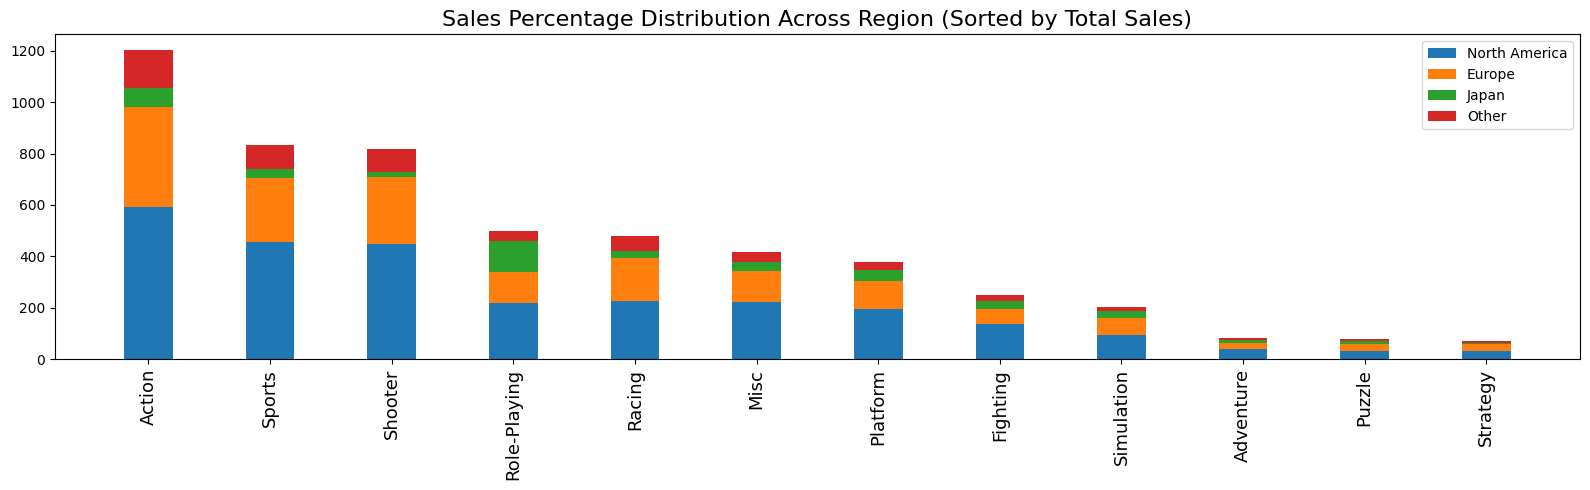

In [57]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Assuming 'vgs' is your DataFrame

# Group by genre and sum sales for each region
region_sales = vgs.groupby('Genre')[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum().reset_index()

# Calculate total sales for each genre
region_sales['Total_Sales'] = region_sales[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum(axis=1)

# Sort by total sales in descending order
region_sales = region_sales.sort_values(by=['Total_Sales'], ascending=False)

# Extract sales data for each region (after sorting)
North_America = region_sales['NA_Sales']
Europe = region_sales['EU_Sales']
Japan = region_sales['JP_Sales']
Other = region_sales['Other_Sales']
Genre = region_sales['Genre']  # Define Genre

ind = np.arange(len(Genre))  # Use len(Genre) for the range
width = 0.4

plt.figure(figsize=(16, 5))
plt.bar(ind, North_America, width, label='North America')
plt.bar(ind, Europe, width, bottom=North_America, label='Europe')
plt.bar(ind, Japan, width, bottom=North_America + Europe, label='Japan')
plt.bar(ind, Other, width, bottom=North_America + Europe + Japan, label='Other')

plt.xticks(ind, Genre, fontsize=13, rotation=90)  # Rotate x-axis labels
plt.legend()
plt.title('Sales Percentage Distribution Across Region (Sorted by Total Sales)', fontsize=16)
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

In [58]:
import pandas as pd

# Create a new column 'Decade'
vgs['Decade'] = (vgs['Year_of_Release'] // 10) * 10

# Group by decade and genre, then sum global sales
decade_genre_sales = vgs.groupby(['Decade', 'Genre'])['Global_Sales'].sum().reset_index()

# Find the most successful genre in each decade
most_successful_genres = decade_genre_sales.loc[decade_genre_sales.groupby('Decade')['Global_Sales'].idxmax()]

# Display the results
print(most_successful_genres[['Decade', 'Genre', 'Global_Sales']])

    Decade       Genre  Global_Sales
0     1980  Simulation          0.06
1     1990      Action         37.35
13    2000      Action        658.98
25    2010      Action        507.85


In [59]:
import plotly.express as px

In [67]:
decade_genre_sales = vgs.groupby(['Decade', 'Genre'])['Global_Sales'].sum().reset_index()

# Create the line plot
fig = px.line(
    decade_genre_sales,
    x="Decade",
    y="Global_Sales",
    color="Genre",  # Color lines by genre
    title="Global Sales Trend by Genre Over Decades",
    markers=True,  # Add markers to data points
)

fig.show()


In [69]:
vgs.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Decade
0,Wii Sports,Wii,2006,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,Nintendo,2000
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,2000
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0,Nintendo,2000
6,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,2000
7,Wii Play,Wii,2006,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,2000


check unique values in categorical columns

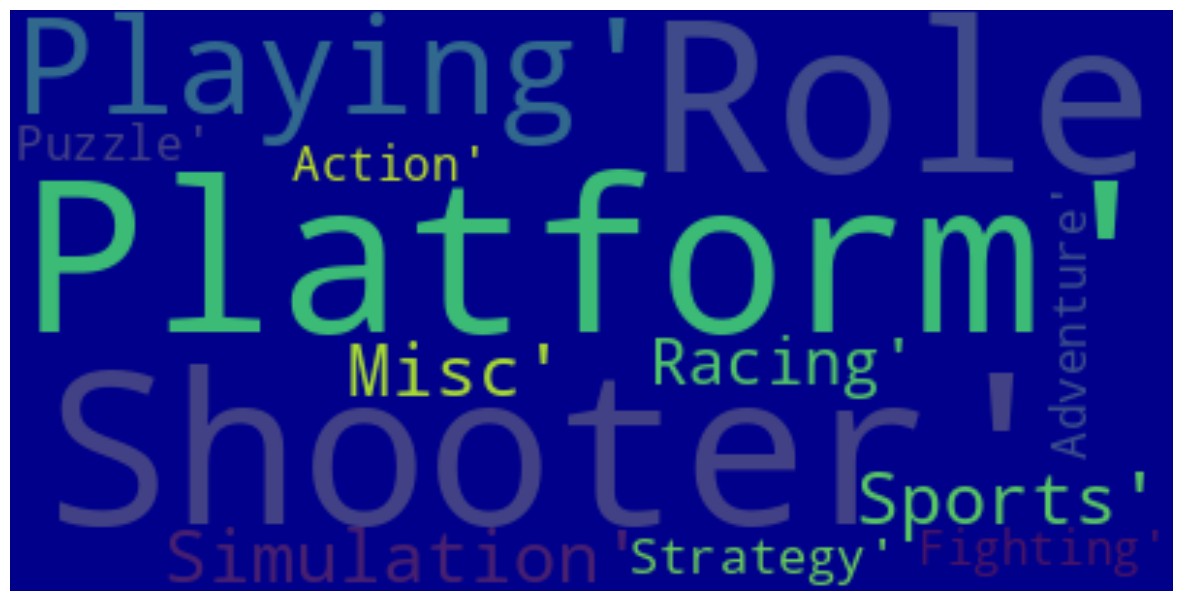

In [86]:
!pip install wordcloud

# Import the necessary library
from wordcloud import WordCloud

text = list(set(vgs['Genre']))
plt.rcParams['figure.figsize'] = (15,15)
wordcloud = WordCloud(max_font_size=100, max_words=1000,background_color="darkblue").generate(str(text))

plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")
plt.show()